#  **Land Slide Detection**




# **About Dataset**

Landslides are a natural phenomenon with devastating consequences, frequent in many parts of the world. Thousands of small and medium-sized ground movements follow earthquakes or heavy rainfalls. Landslides have become more damaging in recent years due to climate change, population growth, and unplanned urbanization in unstable mountain areas. Early landslide detection is critical for quick response and management of the consequences. Accurate detection provides information on the landslide's exact location and extent, which is necessary for landslide susceptibility modelling and risk assessment.

Recent advances in machine learning and computer vision combined with the growing availability of satellite imagery and computational resources have facilitated rapid progress in landslide detection. Landslide4Sense aims to promote research in this direction and challenges participants to detect landslides around the globe using multi-sensor satellite images. The images are collected from diverse geographical regions offering an important resource for remote sensing, computer vision, and machine learning communities.

## **1. Data Acquisition**

### **1.1.  Install Required Libraries**

In [8]:
!pip install kaggle h5py numpy matplotlib

### **1.2. Upload Kaggle API Key**

In [32]:
from google.colab import files
files.upload()


In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


### **1.3. Download the Dataset**

In [9]:
!kaggle datasets download -d tekbahadurkshetri/landslide4sense

Dataset URL: https://www.kaggle.com/datasets/tekbahadurkshetri/landslide4sense
License(s): other
100% 2.84G/2.85G [00:45<00:00, 88.4MB/s]
100% 2.85G/2.85G [00:45<00:00, 66.7MB/s]


### **1.4. Extract the Dataset**

In [7]:
!unzip landslide4sense.zip

unzip:  cannot find or open landslide4sense.zip, landslide4sense.zip.zip or landslide4sense.zip.ZIP.


# **2. Data Understanding**

In [26]:
import os

# List directories
dataset_dir = "/content"
train_dir = os.path.join(dataset_dir, "TrainData")
valid_dir = os.path.join(dataset_dir, "ValidData")
test_dir = os.path.join(dataset_dir, "TestData")

print("Train directory:", train_dir)
print("Valid directory:", valid_dir)
print("Test directory:", test_dir)

Train directory: /content/TrainData
Valid directory: /content/ValidData
Test directory: /content/TestData


In [27]:
# List files in TrainData/img and TrainData/mask
train_img_dir = os.path.join(train_dir, "img")
train_mask_dir = os.path.join(train_dir, "mask")

train_img_files = sorted(os.listdir(train_img_dir))
train_mask_files = sorted(os.listdir(train_mask_dir))

print("Number of image files:", len(train_img_files))
print("Number of mask files:", len(train_mask_files))

# Check if the filenames match
for img_file, mask_file in zip(train_img_files, train_mask_files):
    img_id = img_file.split('_')[1].split('.')[0]
    mask_id = mask_file.split('_')[1].split('.')[0]
    if img_id != mask_id:
        print(f"Mismatch: {img_file} (image) vs {mask_file} (mask)")

Number of image files: 3799
Number of mask files: 3799


# **3. Data Visualization**

### **3.1. Load and Visualize an Image-Mask Pair**

Image shape: (128, 128, 14)
Mask shape: (128, 128)


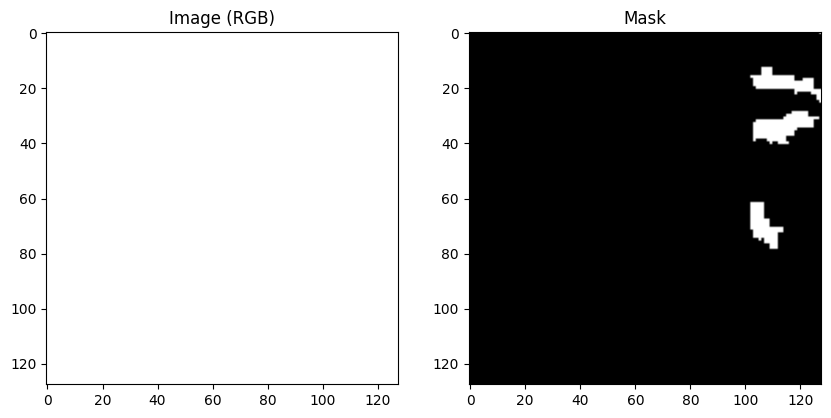

In [28]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Paths to the image and mask files
img_file = train_img_files[0]
mask_file = train_mask_files[0]

image_path = os.path.join(train_img_dir, img_file)
mask_path = os.path.join(train_mask_dir, mask_file)

# Load the image
with h5py.File(image_path, 'r') as f:
    image = np.array(f['img'])
    print(f"Image shape: {image.shape}")

# Load the mask
with h5py.File(mask_path, 'r') as f:
    mask = np.array(f['mask'])
    print(f"Mask shape: {mask.shape}")

# Visualize the image and mask
plt.figure(figsize=(10, 5))

# Display the first 3 channels of the image (assumed to be RGB)
plt.subplot(1, 2, 1)
plt.imshow(image[:, :, :3])  # Use the first 3 channels for visualization
plt.title("Image (RGB)")

# Display the mask
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.show()

###**3.2. Visualize Multiple Samples**

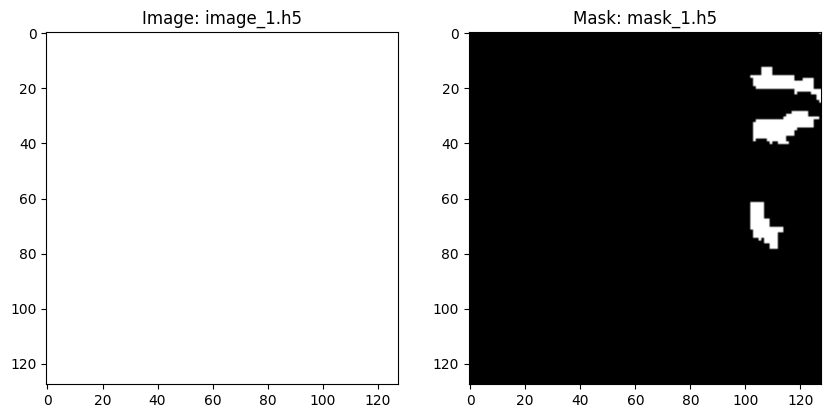

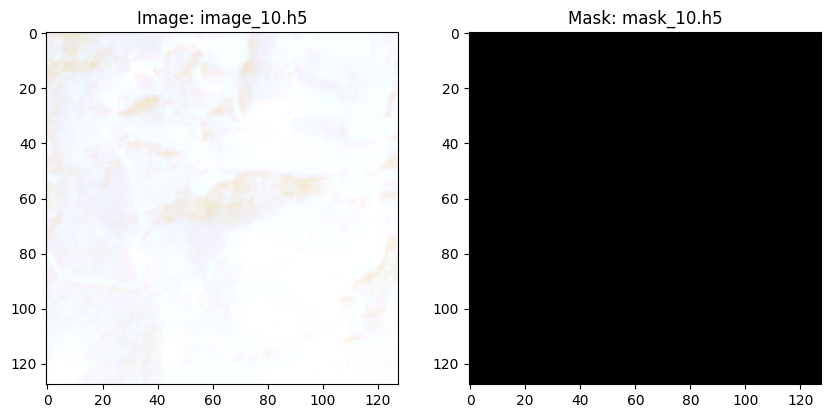

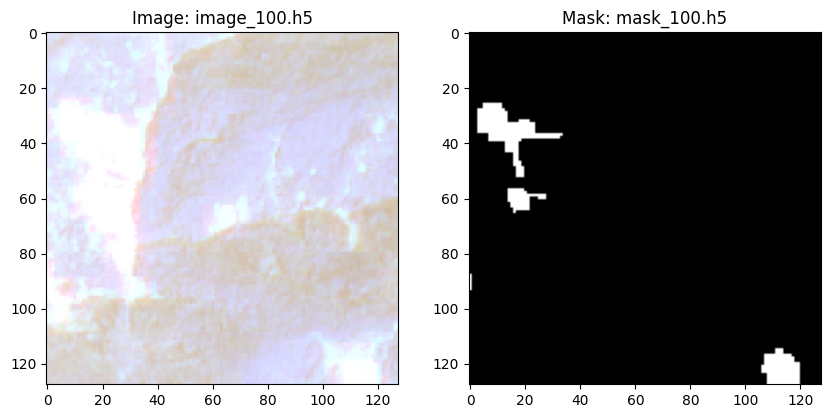

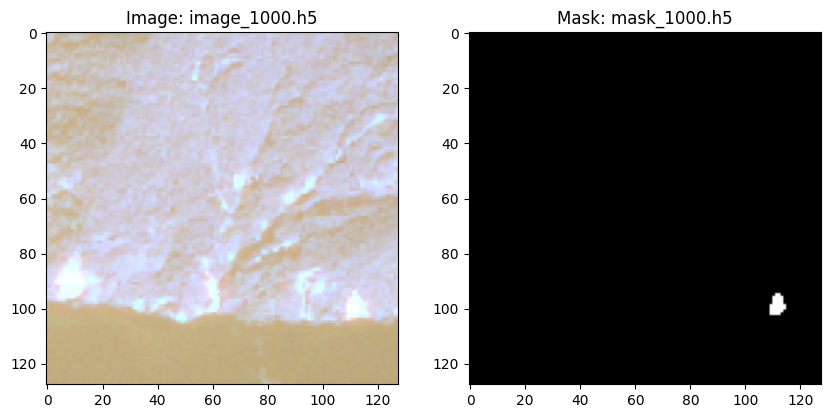

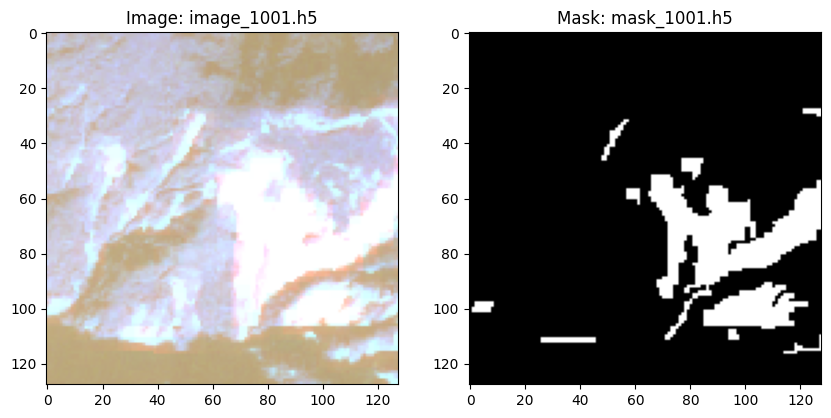

In [29]:
for i in range(5):
    img_file = train_img_files[i]
    mask_file = train_mask_files[i]

    image_path = os.path.join(train_img_dir, img_file)
    mask_path = os.path.join(train_mask_dir, mask_file)

    # Load the image and mask
    with h5py.File(image_path, 'r') as f:
        image = np.array(f['img'])
    with h5py.File(mask_path, 'r') as f:
        mask = np.array(f['mask'])

    # Visualize
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image[:, :, :3])  # Use the first 3 channels for visualization
    plt.title(f"Image: {img_file}")
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title(f"Mask: {mask_file}")
    plt.show()

### **3.3. Channel-wise Visualization**

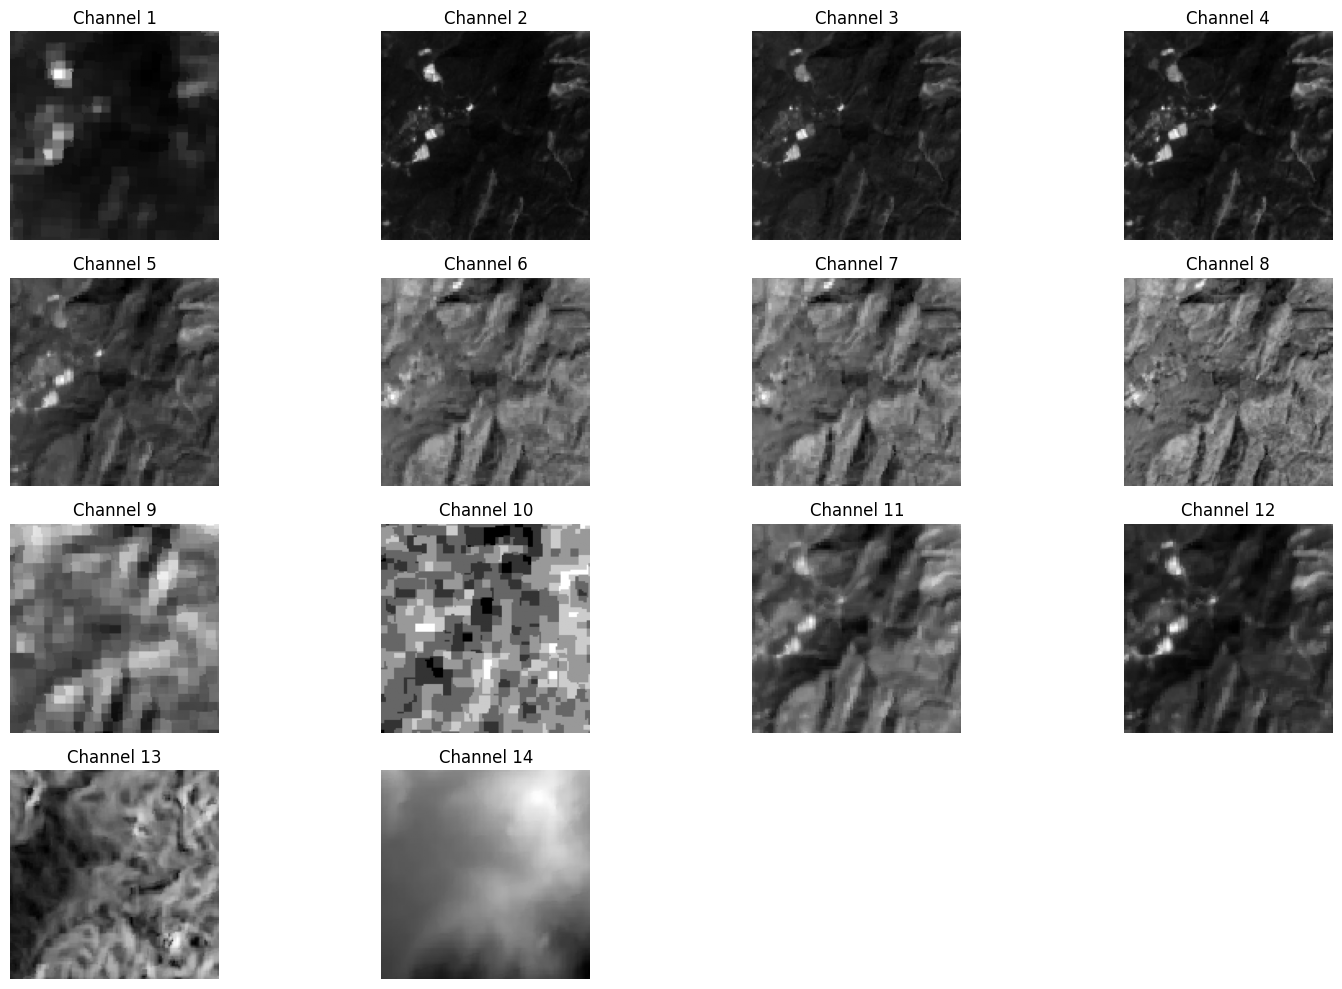

In [33]:
# Load an image
img_file = train_img_files[0]
image_path = os.path.join(train_img_dir, img_file)
with h5py.File(image_path, 'r') as f:
    image = np.array(f['img'])

# Plot all 14 channels
plt.figure(figsize=(15, 10))
for i in range(14):
    plt.subplot(4, 4, i + 1)
    plt.imshow(image[:, :, i], cmap='gray')
    plt.title(f"Channel {i + 1}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### **3.4. Mask Distribution**

Landslide pixels: 405 (2.47%)
Non-landslide pixels: 15979 (97.53%)


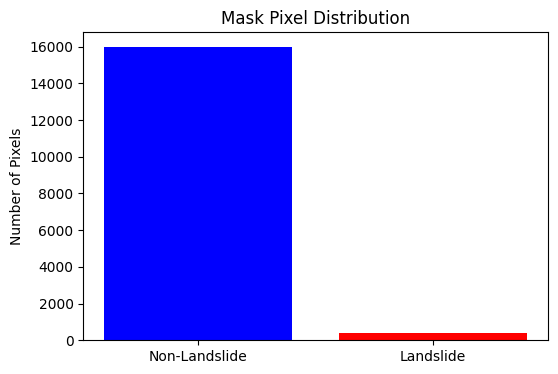

In [35]:
#Analyze the distribution of landslide (1) vs. non-landslide (0) pixels in the mask.
# Load a mask
mask_file = train_mask_files[0]
mask_path = os.path.join(train_mask_dir, mask_file)
with h5py.File(mask_path, 'r') as f:
    mask = np.array(f['mask'])

# Calculate the percentage of landslide vs. non-landslide pixels
landslide_pixels = np.sum(mask == 1)
non_landslide_pixels = np.sum(mask == 0)
total_pixels = mask.size

print(f"Landslide pixels: {landslide_pixels} ({landslide_pixels / total_pixels * 100:.2f}%)")
print(f"Non-landslide pixels: {non_landslide_pixels} ({non_landslide_pixels / total_pixels * 100:.2f}%)")

# Plot the distribution
plt.figure(figsize=(6, 4))
plt.bar(['Non-Landslide', 'Landslide'], [non_landslide_pixels, landslide_pixels], color=['blue', 'red'])
plt.title("Mask Pixel Distribution")
plt.ylabel("Number of Pixels")
plt.show()

**Interpretation**
* Landslide Pixels: 405 pixels (2.47% of the total pixels) are labeled as landslides.

* Non-Landslide Pixels: 15,979 pixels (97.53% of the total pixels) are labeled as non-landslides.

### **3.5. Histograms of Pixel Intensities**

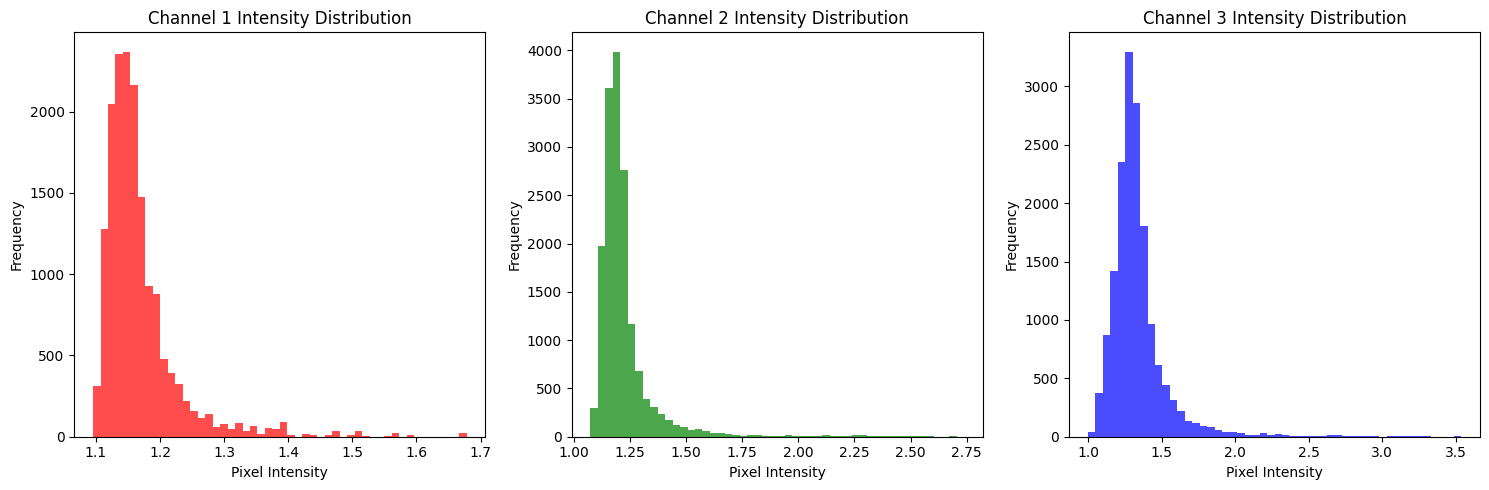

In [39]:
# Plot histograms of pixel intensities for the image and mask to understand their distributions.
# Flatten the image and mask for histogram plotting
image_flat = image[:, :, :3].reshape(-1, 3)  # Use the first 3 channels
mask_flat = mask.ravel()

# Plot histograms for each channel
plt.figure(figsize=(15, 5))
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.hist(image_flat[:, i], bins=50, color=colors[i], alpha=0.7)
    plt.title(f"Channel {i + 1} Intensity Distribution")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#**4. Data Preprocessing**

### **4.1. Normalize Images**

In [30]:
def normalize_image(image):
    return image / 255.0

# Example: Normalize the first image
normalized_image = normalize_image(image)
print("Normalized image range:", normalized_image.min(), normalized_image.max())

Normalized image range: 6.788583864131559e-05 0.022945413460764667


### **4.2. Save Preprocessed Data**

In [31]:
import h5py

# Directory to save processed data
processed_dir = "/content/landslide4sense/processed"
os.makedirs(processed_dir, exist_ok=True)

def preprocess_and_save(image, mask, save_path):
    # Normalize the image
    image = normalize_image(image)

    # Save the processed data
    with h5py.File(save_path, 'w') as f:
        f.create_dataset('image', data=image)
        f.create_dataset('mask', data=mask)

# Process and save all image-mask pairs
for img_file, mask_file in zip(train_img_files, train_mask_files):
    image_path = os.path.join(train_img_dir, img_file)
    mask_path = os.path.join(train_mask_dir, mask_file)

    # Load the image and mask
    with h5py.File(image_path, 'r') as f:
        image = np.array(f['img'])
    with h5py.File(mask_path, 'r') as f:
        mask = np.array(f['mask'])

    # Preprocess and save
    save_path = os.path.join(processed_dir, img_file)
    preprocess_and_save(image, mask, save_path)
    print(f"Processed and saved: {save_path}")

Processed and saved: /content/landslide4sense/processed/image_1.h5
Processed and saved: /content/landslide4sense/processed/image_10.h5
Processed and saved: /content/landslide4sense/processed/image_100.h5
Processed and saved: /content/landslide4sense/processed/image_1000.h5
Processed and saved: /content/landslide4sense/processed/image_1001.h5
Processed and saved: /content/landslide4sense/processed/image_1002.h5
Processed and saved: /content/landslide4sense/processed/image_1003.h5
Processed and saved: /content/landslide4sense/processed/image_1004.h5
Processed and saved: /content/landslide4sense/processed/image_1005.h5
Processed and saved: /content/landslide4sense/processed/image_1006.h5
Processed and saved: /content/landslide4sense/processed/image_1007.h5
Processed and saved: /content/landslide4sense/processed/image_1008.h5
Processed and saved: /content/landslide4sense/processed/image_1009.h5
Processed and saved: /content/landslide4sense/processed/image_101.h5
Processed and saved: /conte